In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn.rcmod import set_style
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import joblib
%matplotlib inline

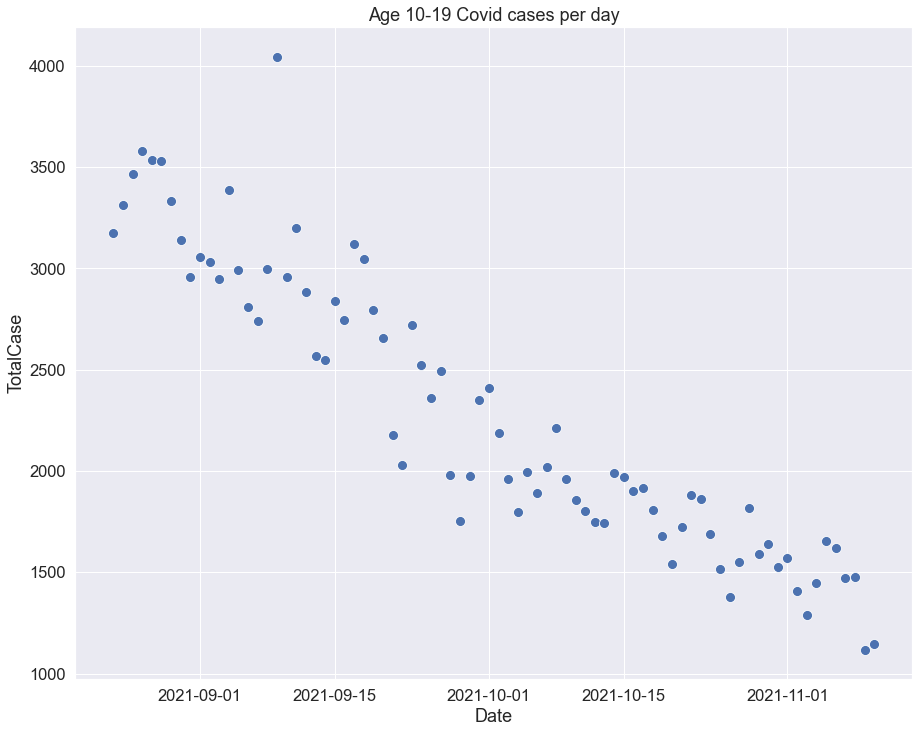

In [35]:
uri = 'data/RealCovid19.csv' #ชื่อไฟล์
df = pd.read_csv(uri)
df.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df.Date = pd.to_datetime(df.Date, format= '%Y-%m-%d')
df.set_index(['Date'],inplace=True)
lst = [int(i)+1 for i in range(80)]
lstA10 = list(zip(lst,df.a10_19,df.index))
df10 = pd.DataFrame(lstA10,columns=['x','TotalCase','Date'])
sns.set_style('darkgrid')
plt.figure(figsize=(15,12))
sns.set(font_scale = 1.5)
plt.title("Age 10-19 Covid cases per day")
sns.scatterplot(x=df10.Date,y=df10.TotalCase,s=100)
# plt.savefig('Capture/CodeSnap/กราฟต่างๆ/10-19/Age 10-19 Covid cases per day.png',format='png',dpi=1200)
plt.show()

In [36]:
df10 = df10.drop(columns=['Date'])
scaler = MinMaxScaler()
d_arr = scaler.fit_transform(df10)
outlier_detection = DBSCAN(eps=0.12,metric='euclidean',min_samples=5,n_jobs = -1)
cluster = outlier_detection.fit_predict(d_arr)
print(f'Outliers found: {list(cluster).count(-1)}')
cluster

Outliers found: 1


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [37]:
df10 = df10.drop(columns=['x'])
df10['Date'] = df.index
df10['cluster'] = cluster
df10['outlier'] = np.where(df10.cluster==-1,True,False)
df10

,TotalCase,Date,cluster,outlier
0,3176,2021-08-23,0,False
1,3313,2021-08-24,0,False
2,3466,2021-08-25,0,False
3,3577,2021-08-26,0,False
4,3533,2021-08-27,0,False
...,...,...,...,...
75,1621,2021-11-06,0,False
76,1471,2021-11-07,0,False
77,1475,2021-11-08,0,False
78,1118,2021-11-09,0,False


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


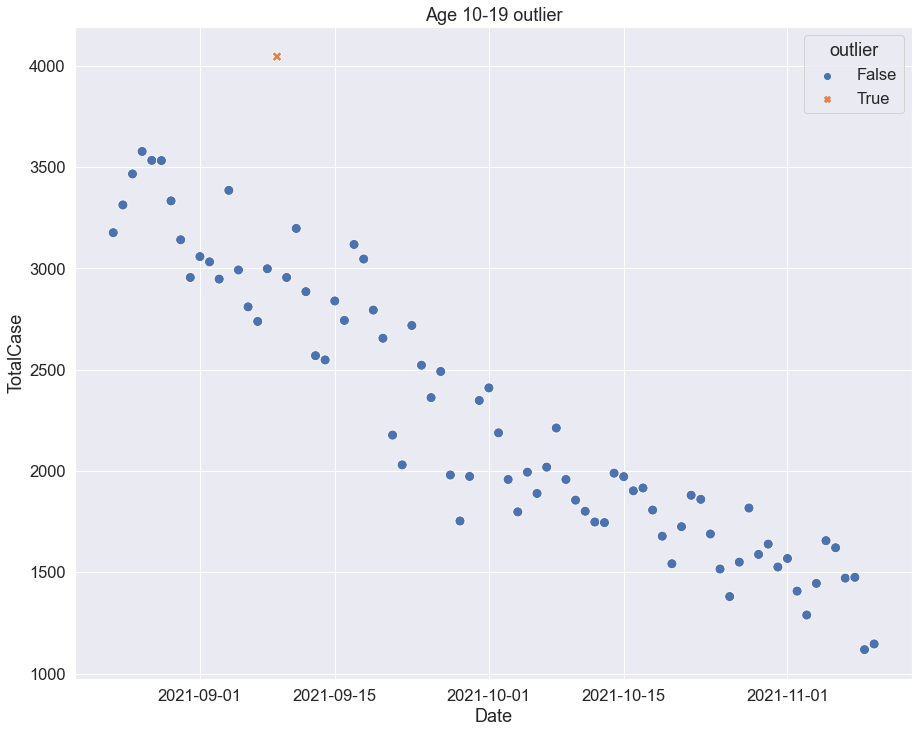

In [38]:
plt.figure(figsize=(15,12))
plt.title("Age 10-19 outlier")
sns.scatterplot('Date','TotalCase',data=df10,hue='outlier',style='outlier',s=100)
# plt.savefig('Capture/CodeSnap/กราฟต่างๆ/10-19/Age 10-19 outlier.png',format='png',dpi=1200)
plt.show()

In [39]:
df10[df10.outlier == True]

,TotalCase,Date,cluster,outlier
17,4045,2021-09-09,-1,True


In [40]:
df10 = df10[df10.cluster > -1]
df10.shape

(79, 4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


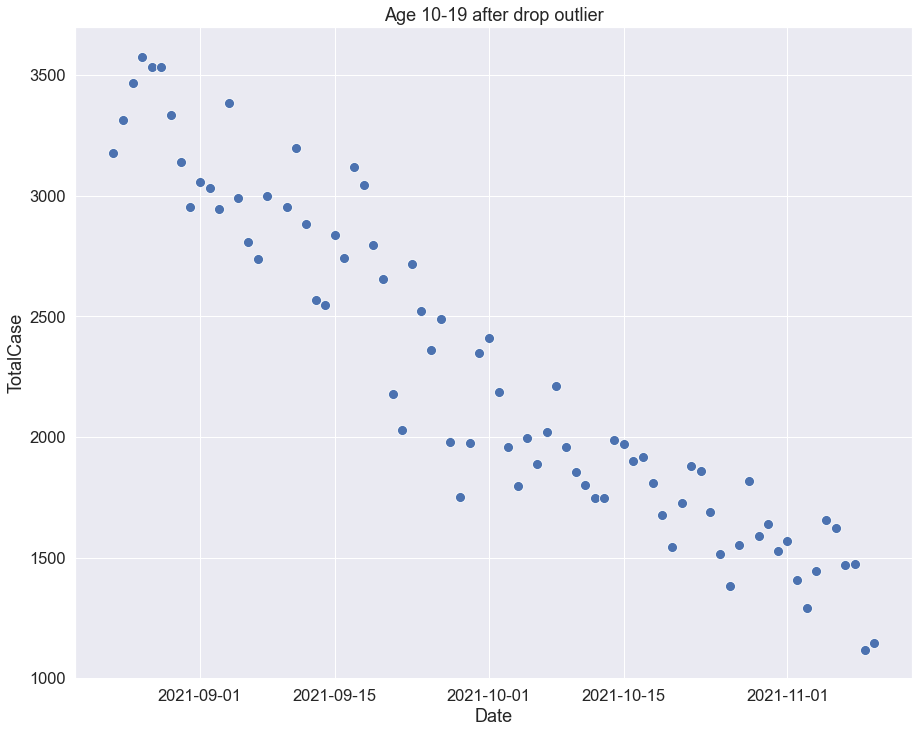

In [41]:
plt.figure(figsize=(15,12))
plt.title("Age 10-19 after drop outlier")
sns.scatterplot('Date','TotalCase',data=df10,s=100)
# plt.savefig('Capture/CodeSnap/กราฟต่างๆ/10-19/Age 10-19 after drop outlier.png',format='png',dpi=1200)
plt.show()

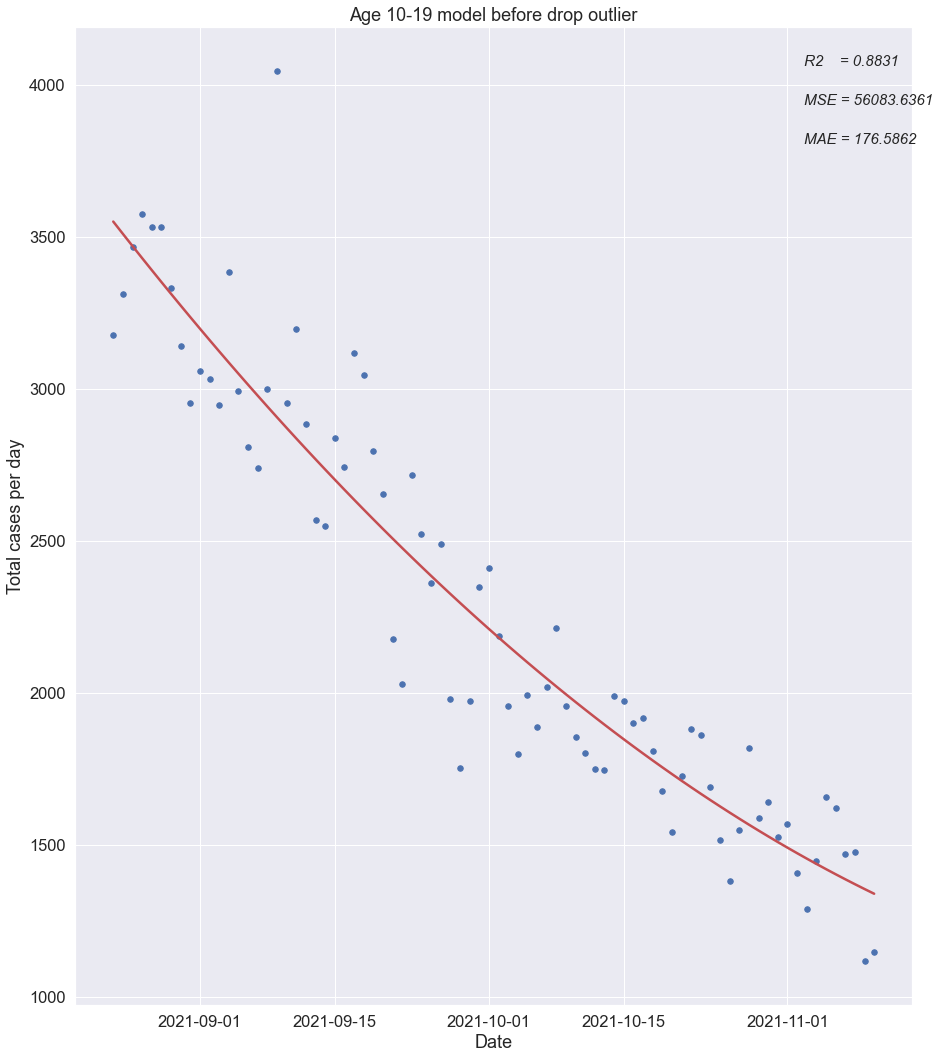

In [42]:
numlist = [int(i)+1 for i in range(80)]
xx = np.array(numlist).reshape(-1,1)       #แปลงให้เป็น Matrix ที่มี 1 column
y = np.array(df.a10_19).reshape(-1,1)

degTemp = 2
poly_features = PolynomialFeatures(degree=degTemp) 
xx_poly = poly_features.fit_transform(xx)      # นำค่า x แปลงเป็น polynomial
model = LinearRegression()                      
model.fit(xx_poly,y) 
y_poly_predict = model.predict(xx_poly)
plt.rcParams['figure.figsize'] = 15,18
plt.scatter(df.index,y,color='b',s=30)                      #จุดข้อมูลจริง
plt.plot(df.index,y_poly_predict,linewidth='2.5',color='r')   #เส้นของ model
plt.ylabel('Total cases per day')
plt.xlabel('Date')
plt.title(f'Age 10-19 model before drop outlier') 

R2 = f'R2    = {r2_score(y,y_poly_predict):.4f}'
M1 = f'MSE = {mean_squared_error(y,y_poly_predict):.4f}'
M2 = f'MAE = {mean_absolute_error(y,y_poly_predict):.4f}'    

plt.text(0.8, 0.85, R2, style='oblique',fontsize=15, transform=plt.gcf().transFigure)
plt.text(0.8, 0.82, M1, style='oblique',fontsize=15, transform=plt.gcf().transFigure)
plt.text(0.8, 0.79, M2, style='oblique',fontsize=15, transform=plt.gcf().transFigure)

# plt.savefig('Capture/CodeSnap/กราฟต่างๆ/10-19/Age 10-19 model before drop outlier.png',format='png',dpi=1200)
plt.show()

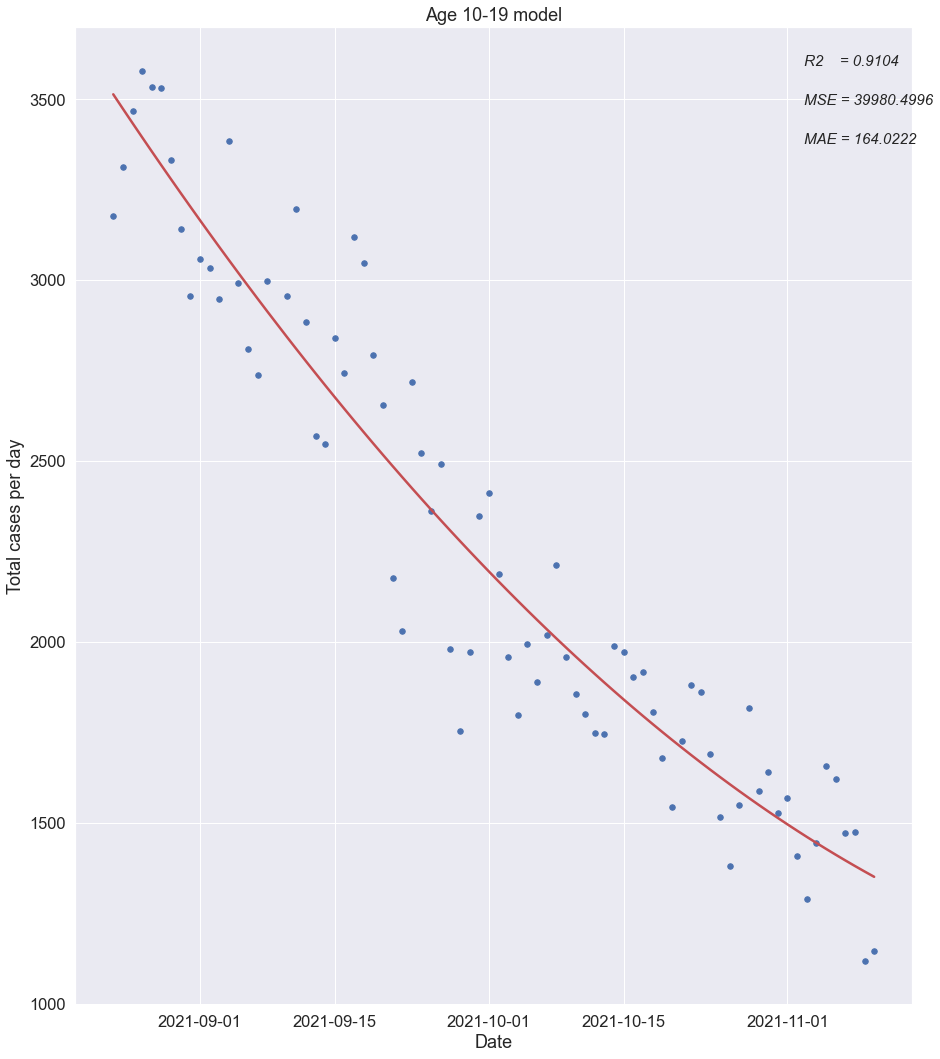

In [43]:
x = np.array(df10.index).reshape(-1,1)       #แปลงให้เป็น Matrix ที่มี 1 column
y = np.array(df10.TotalCase).reshape(-1,1)

degTemp = 2
poly_features = PolynomialFeatures(degree=degTemp) 
x_poly = poly_features.fit_transform(x)      # นำค่า x แปลงเป็น polynomial
model = LinearRegression()                      
model.fit(x_poly,y) 
y_poly_predict = model.predict(x_poly)
plt.rcParams['figure.figsize'] = 15,18
plt.scatter(df10.Date,y,color='b',s=30)                      #จุดข้อมูลจริง
plt.plot(df10.Date,y_poly_predict,linewidth='2.5',color='r')   #เส้นของ model
plt.ylabel('Total cases per day')
plt.xlabel('Date')
plt.title(f'Age 10-19 model') 

R2 = f'R2    = {r2_score(y,y_poly_predict):.4f}'
M1 = f'MSE = {mean_squared_error(y,y_poly_predict):.4f}'
M2 = f'MAE = {mean_absolute_error(y,y_poly_predict):.4f}'    

plt.text(0.8, 0.85, R2, style='oblique',fontsize=15, transform=plt.gcf().transFigure)
plt.text(0.8, 0.82, M1, style='oblique',fontsize=15, transform=plt.gcf().transFigure)
plt.text(0.8, 0.79, M2, style='oblique',fontsize=15, transform=plt.gcf().transFigure)

# plt.savefig('Capture/CodeSnap/กราฟต่างๆ/10-19/Age 10-19 model.png',format='png',dpi=1200)
plt.show()

In [44]:
# save the model to disk
filename = 'model/10-19_model.sav'
joblib.dump(model, open(filename, 'wb'))